# <center>Autoencoding</center>

## Objectifs :
1. Simple autoencoder
1. Deep autoencoder
1. Denoising autoencoder

## Imports :

In [1]:
# Général
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import randint

# Fonctions
from keras.layers import Activation, Dense, Input, Conv2D, Flatten, Reshape, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.models import Model

# MNIST Dataset
from keras.datasets import mnist #https://keras.io/examples/mnist_cnn/

Using TensorFlow backend.


## 1. Simple autoencoder
Créer un autoencoder et utiliser chacune de ses parties pour afficher les données à chaque étape

### Dataset :

In [2]:
(x_train, _), (x_test, y_test) = mnist.load_data()
x_train, x_test, _, _ = train_test_split(x_test, y_test, test_size = 0.2) 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(8000, 784)
(2000, 784)


### Exercice :

In [3]:
# The goal is to reduce from 784 to 32 pixels when encoding
encoding_dim = 32
original_dim = 784

# Required for compilation
optimizer = 'adam'
loss      = 'binary_crossentropy'
metrics   =['accuracy']

In [4]:
#TODO

### Résultat :

In [6]:
def printResult(original, bottleneck, predicted):
    
    n = 10  # how many digits we will display
    plt.figure(figsize=(16, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoding
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(bottleneck[i].reshape(8, 4))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(predicted[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
printResult(x_test, encoded_imgs, decoded_imgs)

## 2. Deep autoencoder
Ajouter une couche à l'autoencoder précédent, l'entrainement se fera en deux étapes

In [7]:
# The goal is to reduce from 784 to 32 pixels when encoding
encoding_dim = [32, 128]
original_dim = 784

In [8]:
#TODO

In [9]:
# Train the autoencoder

In [10]:
# Display the original, encoded and decoded images

## 3. Denoising convolutional autoencoder
Créer des autoencoders capables de surmonter le bruit et le masquage des données d'entrée

### Dataset :

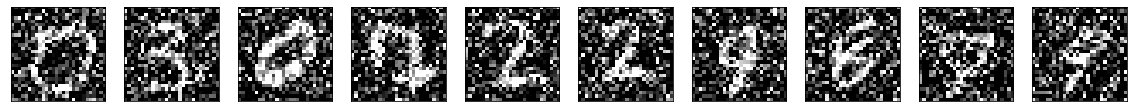

In [11]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

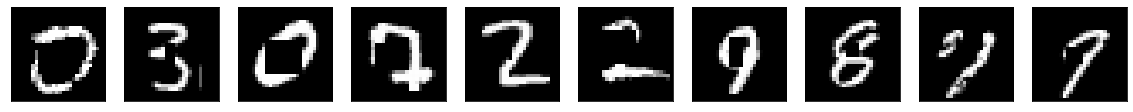

In [18]:
x_train_masking = copy.deepcopy(x_train)
x_test_masking = copy.deepcopy(x_test)

def masking(x):
    
    for img in x:
        
        a = randint(6, 13)
        b = randint(13, 20)
        c = randint(6, 13)
        d = randint(13, 20)
        
        for i in range(a, b):
            for j in range(c, d):
                img[i,j] = 0
            
        
    return x
        
x_train_masking = masking(x_train_masking)
x_test_masking = masking(x_test_masking)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_masking[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Exercice :

- Input
- Convolution 2D
- Max Pooling 2D
- Convolution 2D
- Max Pooling 2D
<br>

- Convolution 2D

- Up Sampling 2D
- Convolution 2D
- Up Sampling 2D
- Convolution 2D

In [13]:
# Compilation
optimizer='adadelta'
loss='binary_crossentropy'

In [14]:
#TODO

### Training with input containing noisy input

In [ ]:
# Train the autoencoder

In [15]:
# Display the original, encoded and decoded images

### Training with input containing masked data

In [16]:
# Train the autoencoder

In [17]:
# Display the original, encoded and decoded images